# Binary Classification with Logistic Regression

In this week's notebook the goal is to train a binary classification model using logistic regression. Please do not modify the section of code with a comment ```DO NOT MODIFY``` otherwise you might get different results.

The goal is to not use scikit-learn for the first part and implement gradient descent in numpy as an exercise. Then we will compare the result that scikit-learn gives us and discuss what the differences are in our implementation.

See (https://scikit-learn.org/stable/) for more details about scikit-learn

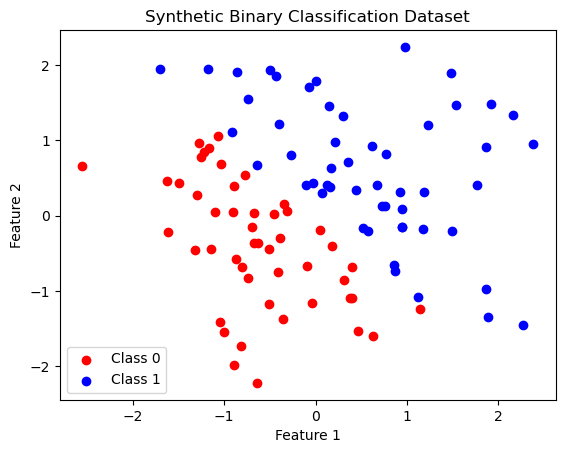

In [1]:
# DO NOT MODIFY
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic data
def generate_data(n_samples=100):
    X = np.random.randn(n_samples, 2)  # 2 features
    y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Class 1 if sum of features > 0, else class 0
    return X, y

# Generate training data
X_train, y_train = generate_data(100)

# Plot the dataset
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Class 0', color='red')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Class 1', color='blue')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Synthetic Binary Classification Dataset')
plt.show()

### Some helper functions

In [2]:
# DO NOT MODIFY
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w):
    # Linear combination: X * w
    z = np.dot(X, w)
    # Apply sigmoid function to get the probability
    return sigmoid(z)

def predict_class(X, w):
    probabilities = predict(X, w)
    return (probabilities >= 0.5).astype(int)  # Class 1 if prob >= 0.5, else class 0

def compute_gradient(X, y, w):
    # Predicted probabilities
    predictions = predict(X, w)
    
    # Gradient: (1/N) * sum((predictions - y) * X)
    gradient = np.dot(np.transpose(X), (predictions - y)) / len(y)
    return gradient

### Implementing gradient descent (exercise)

Now it is up to you to implement gradient descent, you need to iteratively apply the following update rule to the weights $\mathbf{w}$ and return them from the following function 

$$ \mathbf{w}_{t+1} = \mathbf{w}_t - \eta \cdot \nabla \mathcal{L}_{\mathbf{w}}$$

In [3]:
def gradient_descent(X, y, w_init, learning_rate=0.1, num_iterations=1000):
    w = w_init
    
    # TODO - you need to implement gradient descent which iteratively updated the weights w by subracting the gradient with small steps
    
    for i in range(num_iterations):
        # Compute the gradient
        gradient = compute_gradient(X, y, w)
        # Update weights using the gradient descent rule
        w -= learning_rate * gradient
        
    return w

### Training the logistic regression model



In [4]:
# Add a bias term (intercept) to the dataset - DO NOT MODIFY THIS LINE OF CODE
X_train_bias = np.concatenate([np.ones(X_train.shape[0]).reshape(-1, 1), X_train], axis=1)  # Add a column of ones to X

# Initialize weights to zero (with the same size as the number of features + 1 for the bias)
# You can play around with different initializations of the weights, all zeros, all ones, sampled from a normal distribution? 
# w_init = np.ones(X_train_bias.shape[1])
# w_init = np.random.randn(X_train_bias.shape[1])
w_init = np.zeros(X_train_bias.shape[1])

# Train the model using gradient descent
# You can play around with the learning rate and number of iterations, its up to you
w_opt = gradient_descent(X_train_bias, y_train, w_init, learning_rate=0.1, num_iterations=1000)

# Print the optimized weights
print("Optimized weights:", w_opt)

Optimized weights: [-0.02964354  3.95411916  3.68371913]


### Making predicitions

In [5]:
# Make predictions on the training set
y_pred = predict_class(X_train_bias, w_opt)

# Print some of the predictions
print("Predictions:", y_pred[:10])

Predictions: [1 1 1 1 1 1 1 1 1 0]


### Computing the confusion matrix (exercise)

Now it is up to you to compute the confusion matrix using the formulas from the notes.

In [6]:
def confusion_matrix(y_true, y_pred):
    # True positives (TP), false positives (FP), false negatives (FN), true negatives (TN)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    
    return TP, FP, FN, TN

# Compute the confusion matrix
TP, FP, FN, TN = confusion_matrix(y_train, y_pred)

# Print the confusion matrix
print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")

TP: 51, FP: 0, FN: 1, TN: 48


### Computing the performance metrics (exercise)

Now it is up to you to compute the performance metrics, precision, recall and accuracy using the formulas from the notes.

In [7]:
def compute_metrics(TP, FP, FN, TN):
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    return accuracy, precision, recall

# Calculate performance metrics
accuracy, precision, recall = compute_metrics(TP, FP, FN, TN)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9900
Precision: 1.0000
Recall: 0.9808


### Plotting the decision boundary



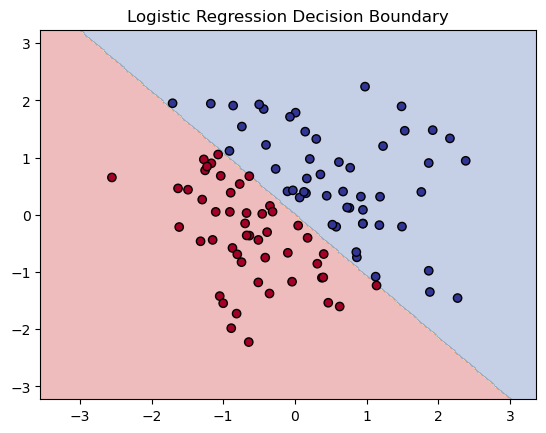

In [8]:
def plot_decision_boundary(X, y, y_pred, w):
    # Create a grid of points
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class label for each point on the grid
    Z = predict_class(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()], w)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and data points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
    plt.title("Logistic Regression Decision Boundary")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_train, y_train, y_pred, w_opt)

### Using scikit-learn

Now you can use scikit-learn to do the logistic regression for you - make sure everything else is working up until this point before running the following code. Do you see any differences in results?

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0).fit(X_train, y_train)

w_sklearn = np.concatenate([model.intercept_.reshape(-1, 1), model.coef_], axis=1)[0]

y_pred_sklearn = model.predict(X_train)

# Compute the confusion matrix
TP, FP, FN, TN = confusion_matrix(y_train, y_pred_sklearn)

# Print the confusion matrix
print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")

# Calculate performance metrics
accuracy, precision, recall = compute_metrics(TP, FP, FN, TN)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

TP: 51, FP: 1, FN: 1, TN: 47
Accuracy: 0.9800
Precision: 0.9808
Recall: 0.9808


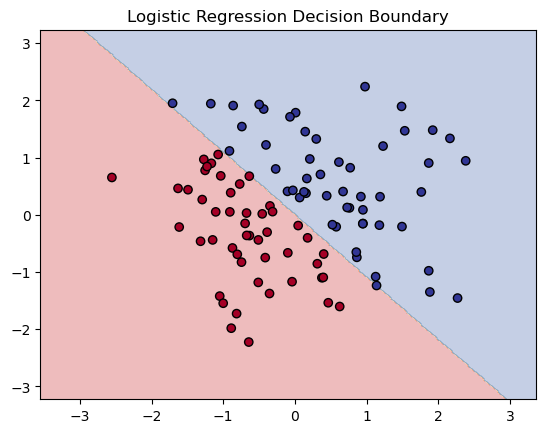

In [10]:
# Plot the decision boundary
plot_decision_boundary(X_train, y_train, y_pred_sklearn, w_sklearn)